# **CS 181 HW5 Problem 1**
---

#### Initialize data and parameters

Consider a specific example of when we have $K = 3$ component Gamma distributions. Let's initialize the initial parameter values for $\theta$ and $\beta_k$ as follows:
$$
\begin{align*}
  \theta_k &=  1/K, \\
  \beta_k & = k/K.
\end{align*}
$$

Note that we usually initialize $\theta$ and $\beta_k$ randomly. However, by fixing the initial $\theta$ and $\beta_k$, EM becomes deterministic which makes debugging (and grading) easier.



In [1]:
import torch
import torch.distributions as ds
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

x = torch.load('data.pt')

K = 3
theta = torch.ones(K) / K
alpha = 5.0
betas = (torch.arange(K) + 1) / K

torch.set_printoptions(sci_mode=False)

In [2]:
# # uncomment to use numpy (optional)
# import numpy as np
# from scipy.stats import gamma
# x = x.numpy()
# theta = theta.numpy()
# betas = betas.numpy()

#### **Todo:** implement the E-step

In [3]:
def e_step(theta, betas):
    log_q = ds.gamma.Gamma(alpha, betas).log_prob(x) + torch.log(theta)
    q = torch.exp(log_q - log_q.logsumexp(dim=1, keepdim=True))
    return q

#### **Todo:** implement the M-step

In [4]:
def m_step(q):
    q_sums = torch.sum(q, 0)
    theta_hat = q_sums / q.shape[0]
    beta_hats = alpha * q_sums / torch.sum(q * x, 0)
    return theta_hat, beta_hats

#### **Todo:** implement log likelihood

In [5]:
def log_px(x, theta, betas):
    non_log_ps = (ds.gamma.Gamma(alpha, betas).log_prob(x) + torch.log(theta)).exp()
    p = torch.log(non_log_ps.sum(1))
    return p

def log_likelihood(theta, betas):
    return log_px(x, theta, betas).sum()

#### **Todo:** implement EM algorithm

In [6]:
def run_em(theta, betas, iterations=1000):
    for _ in range(iterations):
        q = e_step(theta, betas)
        theta, betas = m_step(q)
    return theta, betas

#### Plot

In [7]:
def make_plot(theta, betas):
    x_test = torch.linspace(0.01, x.max(), 1000)
    prob = log_px(x_test.unsqueeze(-1), theta, betas).exp()
    # prob = np.exp(log_px(x_test.unsqueeze(-1), theta, betas))  # use this line for numpy
    ll = log_likelihood(theta, betas)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3))
    
    fig.subplots_adjust(top=0.7)
    fig.suptitle(f'theta = {theta}\nbeta = {betas}\nlog likelihood = {ll:.3e}')

    ax1.set_title('Dataset')
    ax1.hist(x.T, bins=100, color='tomato')
    # ax1.hist(x, bins=100, color='tomato')  # use this line for numpy
    ax2.set_title('Gamma mixture')
    ax2.plot(x_test, prob, color='tomato')
    plt.savefig('p1.pdf', bbox_inches='tight')

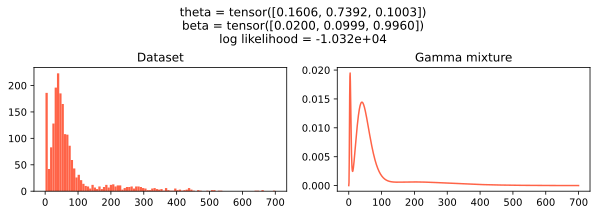

In [8]:
theta, betas = run_em(theta, betas)
make_plot(theta, betas)